## PHASE 1 Data Preprocessing & EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, confusion_matrix,
    classification_report
)

sns.set(style="whitegrid")

In [2]:
housing = fetch_california_housing()

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["MedHouseVal"] = housing.target

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Separate features and target
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# First split: Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# Second split: Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (14448, 8)
Validation shape: (3096, 8)
Test shape: (3096, 8)


The dataset was split into:
- 70% Training Set
- 15% Validation Set
- 15% Test Set

The split was random and reproducible using random_state=42.


In [4]:
print("Missing values in dataset:")
print(df.isnull().sum())

Missing values in dataset:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


No missing values were found in the dataset. Therefore, no imputation was required.


In [5]:
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test sets
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Scaling completed.")

Scaling completed.


In [7]:
joblib.dump(scaler, "../models/scaler.pkl")
print("Scaler saved successfully.")

Scaler saved successfully.


Feature scaling was performed using StandardScaler.
The scaler was fitted only on the training data to prevent data leakage.
Validation and test sets were transformed using the same scaler.


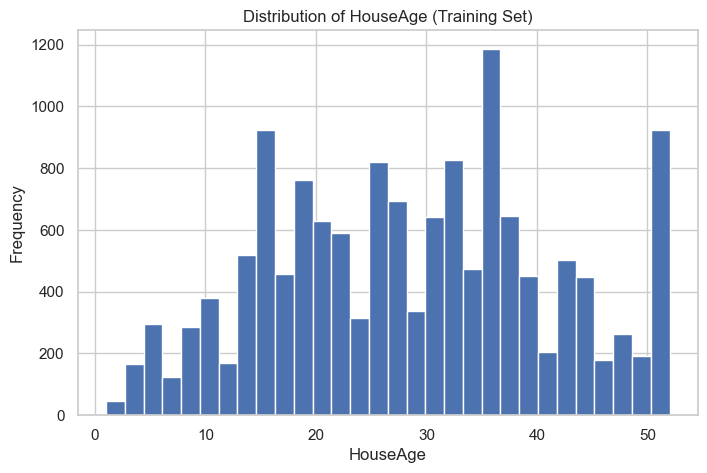

In [8]:
plt.figure(figsize=(8,5))
plt.hist(X_train["HouseAge"], bins=30)
plt.title("Distribution of HouseAge (Training Set)")
plt.xlabel("HouseAge")
plt.ylabel("Frequency")
plt.show()

In [9]:
plt.figure(figsize=(8,5))
plt.hist(X_train["HouseAge"], bins=30)
plt.title("Distribution of HouseAge (Training Set)")
plt.xlabel("HouseAge")
plt.ylabel("Frequency")
plt.savefig("../static/images/HouseAge_histogram.png")
plt.close()

The histogram shows that most block groups have a median income between 2 and 6.
The distribution is slightly right-skewed.


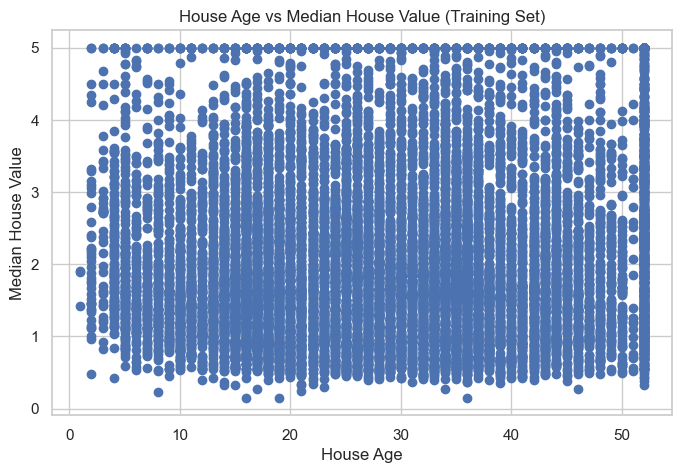

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(X_train["HouseAge"], y_train)
plt.title("House Age vs Median House Value (Training Set)")
plt.xlabel("House Age")
plt.ylabel("Median House Value")
plt.show()

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(X_train["HouseAge"], y_train)
plt.title("House Age vs Median House Value (Training Set)")
plt.xlabel("House Age")
plt.ylabel("Median House Value")
plt.savefig("../static/images/scatter_HouseAge_price.png")
plt.close()

The scatter plot shows a positive relationship between median income and house value.
Higher income areas generally have higher house prices


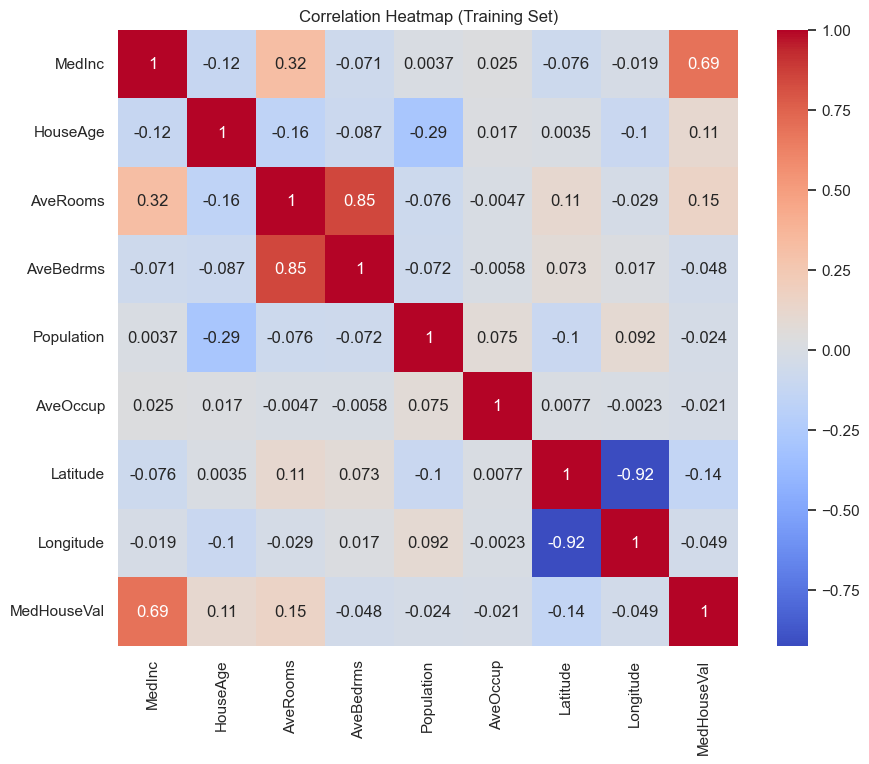

In [12]:
train_df = X_train.copy()
train_df["MedHouseVal"] = y_train

plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Training Set)")
plt.show()

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Training Set)")
plt.savefig("../static/images/correlation_heatmap.png")
plt.close()

Median Income has the strongest positive correlation with Median House Value.
Latitude and Longitude show geographical influence on house prices.


## PHASE 2 : REGRESSION ANALYSIS


In [14]:
# -------- Simple Linear Regression (Using HouseAge only) --------

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Select only one feature
X_train_simple = X_train[["HouseAge"]]
X_val_simple = X_val[["HouseAge"]]
X_test_simple = X_test[["HouseAge"]]

# Scale the feature
scaler_simple = StandardScaler()
X_train_simple_scaled = scaler_simple.fit_transform(X_train_simple)
X_val_simple_scaled = scaler_simple.transform(X_val_simple)
X_test_simple_scaled = scaler_simple.transform(X_test_simple)

# Train model
simple_model = LinearRegression()
simple_model.fit(X_train_simple_scaled, y_train)

# Validation predictions
y_val_pred_simple = simple_model.predict(X_val_simple_scaled)

# Validation metrics
mse_val_simple = mean_squared_error(y_val, y_val_pred_simple)
r2_val_simple = r2_score(y_val, y_val_pred_simple)

print("Simple Linear Regression (HouseAge) - Validation MSE:", mse_val_simple)
print("Simple Linear Regression (HouseAge) - Validation R2:", r2_val_simple)

Simple Linear Regression (HouseAge) - Validation MSE: 1.2862560441314417
Simple Linear Regression (HouseAge) - Validation R2: 0.0126743440433843


In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X_val_simple, y_val, alpha=0.5, label="Actual Values")
plt.scatter(X_val_simple, y_val_pred_simple, alpha=0.5, label="Predicted Values")
plt.xlabel("House Age")
plt.ylabel("Median House Value")
plt.title("Simple Linear Regression (HouseAge)")
plt.savefig("../static/images/simple.png")
plt.legend()
plt.show()

In [15]:
# -------- Multiple Linear Regression (All Features) --------

# Train model
multiple_model = LinearRegression()
multiple_model.fit(X_train_scaled, y_train)

# Validation predictions
y_val_pred_multiple = multiple_model.predict(X_val_scaled)

# Validation metrics
mse_val_multiple = mean_squared_error(y_val, y_val_pred_multiple)
r2_val_multiple = r2_score(y_val, y_val_pred_multiple)

print("Multiple Linear Regression - Validation MSE:", mse_val_multiple)
print("Multiple Linear Regression - Validation R2:", r2_val_multiple)


Multiple Linear Regression - Validation MSE: 0.5408750691093341
Multiple Linear Regression - Validation R2: 0.5848261822866256


In [16]:
# -------- Feature Selection Based on Correlation --------

train_df = X_train.copy()
train_df["MedHouseVal"] = y_train

correlations = train_df.corr()["MedHouseVal"].sort_values(ascending=False)
print(correlations)

MedHouseVal    1.000000
MedInc         0.688229
AveRooms       0.152106
HouseAge       0.106549
AveOccup      -0.020960
Population    -0.024316
AveBedrms     -0.048455
Longitude     -0.049347
Latitude      -0.141528
Name: MedHouseVal, dtype: float64


"The Multiple Linear Regression model significantly outperformed the Simple Linear Regression model. The R² improved from 0.012 to 0.585, indicating that using multiple socio-economic and geographical features greatly enhances predictive performance."

In [17]:
selected_features = ["MedInc", "AveRooms", "Latitude", "HouseAge"]

X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

# Scale selected features
scaler_selected = StandardScaler()
X_train_selected_scaled = scaler_selected.fit_transform(X_train_selected)
X_val_selected_scaled = scaler_selected.transform(X_val_selected)
X_test_selected_scaled = scaler_selected.transform(X_test_selected)


In [18]:
# -------- Tuned Regression Model --------

tuned_model = LinearRegression()
tuned_model.fit(X_train_selected_scaled, y_train)

# Validation predictions
y_val_pred_tuned = tuned_model.predict(X_val_selected_scaled)

# Validation metrics
mse_val_tuned = mean_squared_error(y_val, y_val_pred_tuned)
r2_val_tuned = r2_score(y_val, y_val_pred_tuned)

print("Tuned Model - Validation MSE:", mse_val_tuned)
print("Tuned Model - Validation R2:", r2_val_tuned)


Tuned Model - Validation MSE: 0.6559731528047934
Tuned Model - Validation R2: 0.4964772944408119


In [19]:
print("Validation Results Comparison:")
print("--------------------------------")
print("Simple Regression R2:", r2_val_simple)
print("Multiple Regression R2:", r2_val_multiple)
print("Tuned Regression R2:", r2_val_tuned)


Validation Results Comparison:
--------------------------------
Simple Regression R2: 0.0126743440433843
Multiple Regression R2: 0.5848261822866256
Tuned Regression R2: 0.4964772944408119


In [20]:
# -------- Final Test Evaluation --------

y_test_pred = multiple_model.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Final Test MSE:", mse_test)
print("Final Test R2:", r2_test)


Final Test MSE: 0.5202604958440162
Final Test R2: 0.6065519204153755


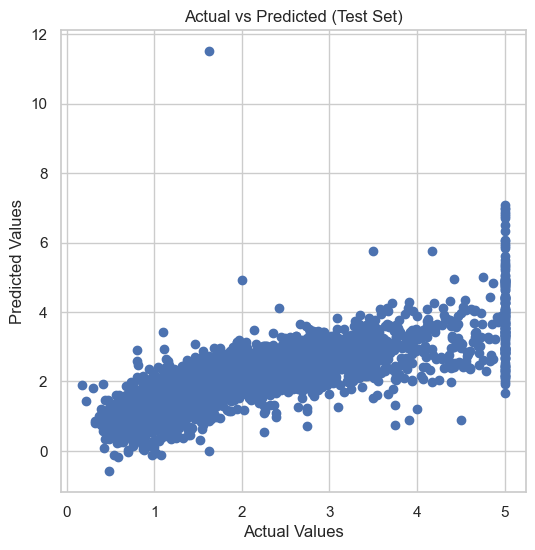

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Test Set)")
plt.savefig("../static/images/actual_vs_predicted.png")
plt.show()


In [23]:
import joblib

joblib.dump(multiple_model, "../models/regression_model.pkl")
print("Regression model saved successfully.")

Regression model saved successfully.


# Phase 3: Classification Models
## Objective: Classify houses into Low, Medium, High value categories

In [24]:
# Calculate percentiles from training target
low_threshold = y_train.quantile(0.33)
high_threshold = y_train.quantile(0.66)

print("Low threshold:", low_threshold)
print("High threshold:", high_threshold)

Low threshold: 1.405
High threshold: 2.273


In [25]:
def categorize_price(value):
    if value <= low_threshold:
        return 0   # Low
    elif value <= high_threshold:
        return 1   # Medium
    else:
        return 2   # High

# Create classification targets
y_train_clf = y_train.apply(categorize_price)
y_val_clf = y_val.apply(categorize_price)
y_test_clf = y_test.apply(categorize_price)

print("Class distribution (Training Set):")
print(y_train_clf.value_counts())

Class distribution (Training Set):
MedHouseVal
2    4910
0    4771
1    4767
Name: count, dtype: int64


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Create model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Train
log_model.fit(X_train_scaled, y_train_clf)

# Validation accuracy
val_pred_log = log_model.predict(X_val_scaled)
print("Logistic Validation Accuracy:",
      accuracy_score(y_val_clf, val_pred_log))

# Final Test evaluation
test_pred_log = log_model.predict(X_test_scaled)
log_test_accuracy = accuracy_score(y_test_clf, test_pred_log)

print("Logistic Test Accuracy:", log_test_accuracy)
print("\nClassification Report:\n")
print(classification_report(y_test_clf, test_pred_log))

# Save model
joblib.dump(log_model, "../models/logistic_model.pkl")
print("Logistic model saved.")


Logistic Validation Accuracy: 0.7131782945736435
Logistic Test Accuracy: 0.7206072351421189

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1020
           1       0.59      0.61      0.60      1009
           2       0.79      0.80      0.80      1067

    accuracy                           0.72      3096
   macro avg       0.72      0.72      0.72      3096
weighted avg       0.72      0.72      0.72      3096

Logistic model saved.


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions (if not already done)
y_test_pred_log = log_model.predict(X_test_scaled)

# Confusion matrix
cm_log = confusion_matrix(y_test_clf, y_test_pred_log)

plt.figure(figsize=(6,5))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Test Set)")
plt.savefig("../static/images/confusion_matrix_logistic.png")
plt.show()


In [27]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train_scaled, y_train_clf)

# Validation accuracy
val_pred_tree = tree_model.predict(X_val_scaled)
print("Decision Tree Validation Accuracy:",
      accuracy_score(y_val_clf, val_pred_tree))

# Final Test evaluation
test_pred_tree = tree_model.predict(X_test_scaled)
tree_test_accuracy = accuracy_score(y_test_clf, test_pred_tree)

print("Decision Tree Test Accuracy:", tree_test_accuracy)
print("\nClassification Report:\n")
print(classification_report(y_test_clf, test_pred_tree))

# Save model
joblib.dump(tree_model, "../models/decision_tree_model.pkl")
print("Decision Tree model saved.")


Decision Tree Validation Accuracy: 0.7235142118863049
Decision Tree Test Accuracy: 0.7425710594315246

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1020
           1       0.64      0.64      0.64      1009
           2       0.78      0.79      0.79      1067

    accuracy                           0.74      3096
   macro avg       0.74      0.74      0.74      3096
weighted avg       0.74      0.74      0.74      3096

Decision Tree model saved.


In [ ]:
# Generate predictions (if not already done)
y_test_pred_dt = tree_model.predict(X_test_scaled)

# Confusion matrix
cm_dt = confusion_matrix(y_test_clf, y_test_pred_dt)

plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree (Test Set)")
plt.savefig("../static/images/confusion_matrix_decision_tree.png")
plt.show()


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_scaled, y_train_clf)

y_val_pred_rf = rf_model.predict(X_val_scaled)

print("Random Forest - Validation Accuracy:",
      accuracy_score(y_val_clf, y_val_pred_rf))

Random Forest - Validation Accuracy: 0.8000645994832042


In [29]:
# Random Forest Test Prediction
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Store accuracy in variable
rf_test_accuracy = accuracy_score(y_test_clf, y_test_pred_rf)

print("Random Forest Test Accuracy:", rf_test_accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test_clf, y_test_pred_rf))

Random Forest Test Accuracy: 0.8200904392764858

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1020
           1       0.74      0.74      0.74      1009
           2       0.86      0.85      0.86      1067

    accuracy                           0.82      3096
   macro avg       0.82      0.82      0.82      3096
weighted avg       0.82      0.82      0.82      3096



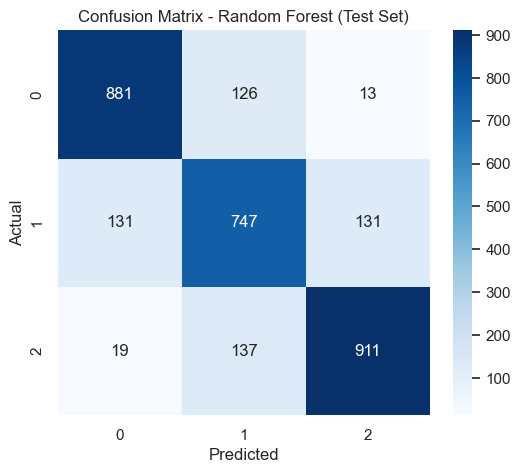

In [30]:
import seaborn as sns

cm = confusion_matrix(y_test_clf, y_test_pred_rf)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (Test Set)")
plt.savefig("../static/images/confusion_matrix_rf.png")
plt.show()

In [31]:
import joblib

joblib.dump(rf_model, "../models/classification_model.pkl")
print("Classification model saved successfully.")

Classification model saved successfully.


# Phase 4: Support Vector Machine (SVM)
## Objective: Train SVM classifier and compare with Random Forest

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [33]:
# Initial SVM with default settings (RBF kernel, C=1)
svm_initial = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

svm_initial.fit(X_train_scaled, y_train_clf)

print("Initial SVM trained on training set.")


Initial SVM trained on training set.


In [34]:
# Try Linear kernel
svm_linear = SVC(kernel='linear', C=1, random_state=42)
svm_linear.fit(X_train_scaled, y_train_clf)

y_val_pred_linear = svm_linear.predict(X_val_scaled)
val_acc_linear = accuracy_score(y_val_clf, y_val_pred_linear)

print("Validation Accuracy (Linear Kernel):", val_acc_linear)


Validation Accuracy (Linear Kernel): 0.7154392764857881


In [35]:
c_values = [0.1, 1, 10]

best_val_accuracy = 0
best_c = None

for c in c_values:
    svm_rbf = SVC(kernel='rbf', C=c, gamma='scale', random_state=42)
    svm_rbf.fit(X_train_scaled, y_train_clf)
    
    y_val_pred = svm_rbf.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val_clf, y_val_pred)
    
    print(f"Validation Accuracy (RBF, C={c}):", val_accuracy)
    
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_c = c

print("\nBest C selected for RBF:", best_c)


Validation Accuracy (RBF, C=0.1): 0.7031653746770026
Validation Accuracy (RBF, C=1): 0.7406330749354005
Validation Accuracy (RBF, C=10): 0.7619509043927648

Best C selected for RBF: 10


In [36]:
print("Linear Kernel Validation Accuracy:", val_acc_linear)
print("Best RBF Validation Accuracy:", best_val_accuracy)


Linear Kernel Validation Accuracy: 0.7154392764857881
Best RBF Validation Accuracy: 0.7619509043927648


In [37]:
svm_best = SVC(kernel='rbf', C=best_c, gamma='scale', random_state=42)
svm_best.fit(X_train_scaled, y_train_clf)

print("Final SVM model trained using validation-selected parameters.")


Final SVM model trained using validation-selected parameters.


In [38]:
y_test_pred_svm = svm_best.predict(X_test_scaled)

svm_test_accuracy = accuracy_score(y_test_clf, y_test_pred_svm)

print("SVM Final Test Accuracy:", svm_test_accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test_clf, y_test_pred_svm))

SVM Final Test Accuracy: 0.7761627906976745

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1020
           1       0.66      0.70      0.68      1009
           2       0.83      0.82      0.83      1067

    accuracy                           0.78      3096
   macro avg       0.78      0.78      0.78      3096
weighted avg       0.78      0.78      0.78      3096



In [39]:
print("Random Forest Test Accuracy:", rf_test_accuracy)
print("SVM Test Accuracy:", svm_test_accuracy)


Random Forest Test Accuracy: 0.8200904392764858
SVM Test Accuracy: 0.7761627906976745


In [40]:
import joblib

joblib.dump(svm_best, "../models/svm_model.pkl")
print("SVM model saved successfully.")

SVM model saved successfully.


# Phase 5: Neural Network (MLP Classifier)

Steps:
1. Train using training set
2. Monitor using validation set
3. Plot training vs validation performance
4. Final test evaluation


In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings("ignore")

In [42]:
mlp = MLPClassifier(hidden_layer_sizes=(64,),
                    activation='relu',
                    solver='adam',
                    max_iter=1,        # Important for manual epoch control
                    warm_start=True,   # Allows training in loops
                    random_state=42)

In [43]:
epochs = 50

train_acc_list = []
val_acc_list = []

train_loss_list = []
val_loss_list = []

mlp = MLPClassifier(hidden_layer_sizes=(64,),
                    activation='relu',
                    solver='adam',
                    max_iter=1,
                    warm_start=True,
                    random_state=42)

for epoch in range(epochs):
    
    mlp.fit(X_train_scaled, y_train_clf)
    
    # Predictions
    train_pred = mlp.predict(X_train_scaled)
    val_pred = mlp.predict(X_val_scaled)
    
    # Accuracy
    train_acc_list.append(accuracy_score(y_train_clf, train_pred))
    val_acc_list.append(accuracy_score(y_val_clf, val_pred))
    
    # Probabilities (needed for loss)
    train_probs = mlp.predict_proba(X_train_scaled)
    val_probs = mlp.predict_proba(X_val_scaled)
    
    # Log Loss
    train_loss_list.append(log_loss(y_train_clf, train_probs))
    val_loss_list.append(log_loss(y_val_clf, val_probs))

print("Training completed.")

Training completed.


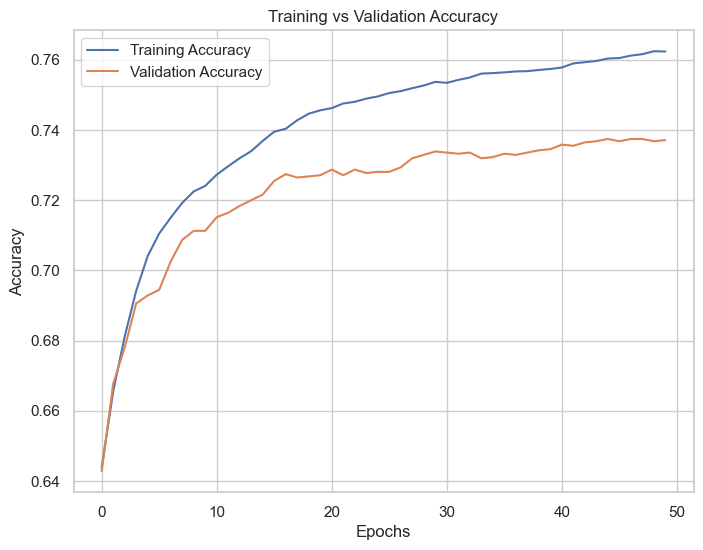

In [44]:
plt.figure(figsize=(8,6))
plt.plot(train_acc_list, label="Training Accuracy")
plt.plot(val_acc_list, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.savefig("../static/images/training_vs_validation_accuracy.png")
plt.legend()
plt.show()


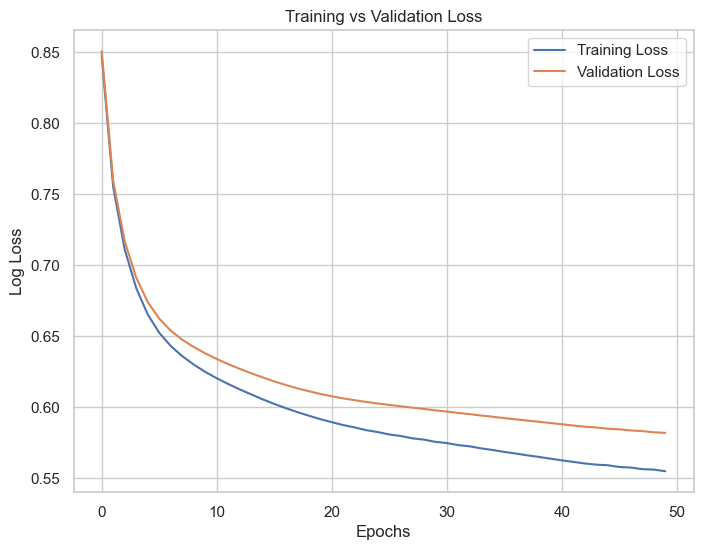

In [45]:
plt.figure(figsize=(8,6))
plt.plot(train_loss_list, label="Training Loss")
plt.plot(val_loss_list, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Training vs Validation Loss")
plt.savefig("../static/images/training_vs_validation_loss.png")
plt.legend()
plt.show()

In [46]:
y_test_pred_nn = mlp.predict(X_test_scaled)

nn_test_accuracy = accuracy_score(y_test_clf, y_test_pred_nn)

print("Neural Network Final Test Accuracy:", nn_test_accuracy)


Neural Network Final Test Accuracy: 0.7616279069767442


In [47]:
import joblib

joblib.dump(mlp, "../models/neural_network_model.pkl")
print("Neural Network model saved.")


Neural Network model saved.


# Clustering Task: Group Housing Regions

Goal:
Group housing regions based on socio-economic and geographical features
using K-Means clustering.


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib

In [49]:
# Remove target column
X_cluster = df.drop(columns=["MedHouseVal"])

print("Clustering features shape:", X_cluster.shape)

Clustering features shape: (20640, 8)


In [50]:
scaler_cluster = StandardScaler()

X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

print("Scaling completed.")


Scaling completed.


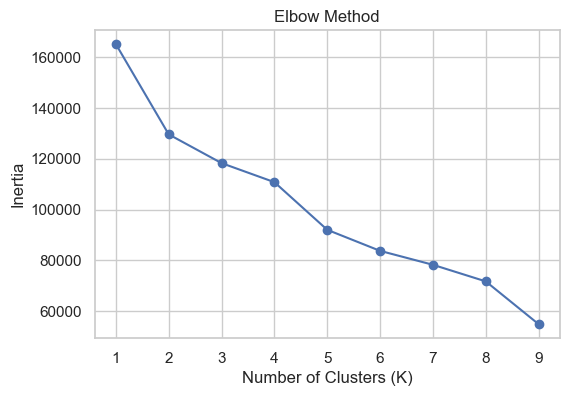

In [51]:
inertia_list = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster_scaled)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_range, inertia_list, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.savefig("../static/images/Elbow_Method.png")
plt.show()


In [52]:
kmeans_final = KMeans(n_clusters=3, random_state=42)

kmeans_final.fit(X_cluster_scaled)

df["Cluster"] = kmeans_final.labels_

print("Final clustering completed.")


Final clustering completed.


In [53]:
cluster_summary = df.groupby("Cluster").mean()

print("Cluster Summary (Mean Values):")
display(cluster_summary)


Cluster Summary (Mean Values):


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
Cluster,,,,,,,,,
0,3.274461,31.192000,4.757117,1.061849,1368.040737,3.067821,33.965549,-118.037338,1.920485
1,3.640480,29.539157,5.397015,1.077180,1236.521197,2.781592,37.982825,-121.758710,1.923918
2,6.425023,17.941455,7.677622,1.262635,2133.511675,3.880439,34.476981,-118.432809,2.945233


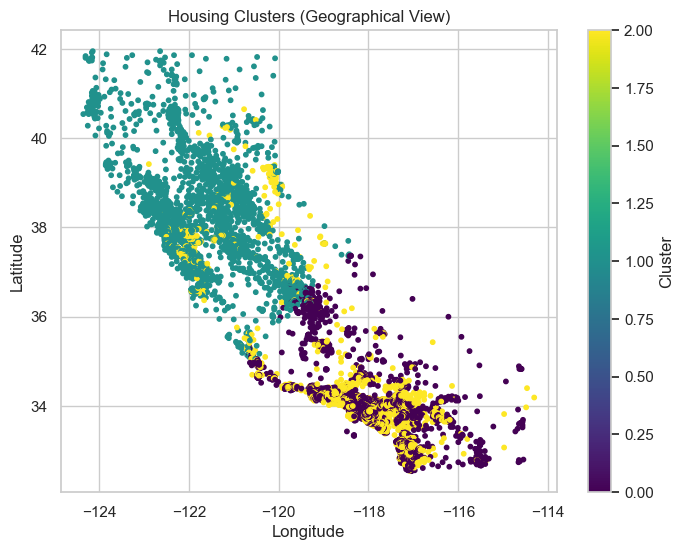

In [54]:
plt.figure(figsize=(8,6))

plt.scatter(df["Longitude"],
            df["Latitude"],
            c=df["Cluster"],
            cmap="viridis",
            s=10)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Housing Clusters (Geographical View)")
plt.colorbar(label="Cluster")
plt.savefig("../static/images/cluster_geographical.png")
plt.show()


In [55]:
pca = PCA(n_components=3)

X_pca_3d = pca.fit_transform(X_cluster_scaled)

print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

print("Total Variance Captured:",
      sum(pca.explained_variance_ratio_))


Explained Variance Ratio:
[0.25336868 0.23516245 0.15888635]
Total Variance Captured: 0.647417472221166


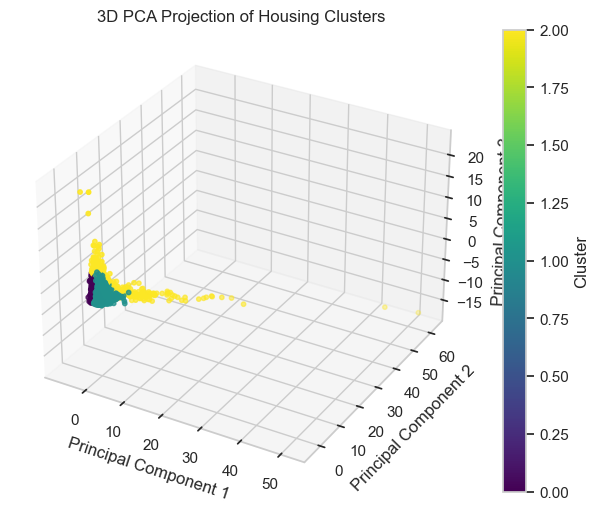

In [56]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_3d[:, 0],
                     X_pca_3d[:, 1],
                     X_pca_3d[:, 2],
                     c=df["Cluster"],
                     cmap="viridis",
                     s=10)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Projection of Housing Clusters")

fig.colorbar(scatter, label="Cluster")
plt.savefig("../static/images/cluster_pca_3d.png")
plt.show()


In [57]:
joblib.dump(kmeans_final, "../models/kmeans_model.pkl")
joblib.dump(scaler_cluster, "../models/cluster_scaler.pkl")

print("Clustering model and scaler saved successfully.")

Clustering model and scaler saved successfully.
